# Análisis de datos con Python

En esta clase veremos la herramienta de análisis de datos `pandas`. Esta herramienta es una librería que permite hacer análisis y limpieza de datos en Python. Está diseñada para trabajar con datos tabulares y heterogéneos. También es utilizada en conjunto con otras herramientas para hacer _Data Science_ como `NumPy`, `SciPy`, `matplotlib` y `scikit-learn`. El objetivo de esta clase/tutorial es tener nociones básicas de la librería `pandas` y conocer cómo esta puede hacer uso de un motor SQL.

### Outline

En esta clase vamos a ver:

- Tópicos básicos de la librería `Pandas`:
 - El tipo `Series`
 - El tipo `DataFrame`
 - Proyecciones y filtros en un `DataFrame`
 - Resumen de los datos
 - Manejar nulos
 - Agregación
 - Índices jerárquicos
 - Hacer *merge* de dos `DataFrame`
- Visualización rápida con `matplotlib`


Para comenzar con `pandas` estudiaremos los tipos `Series` y `DataFrame`. Partimos importando la librería:

In [2]:
import pandas as pd

### Series

Vamos a partir instanciando objetos de tipo `Series`. Estos objetos son como arreglos unidimensionales.

In [ ]:
obj = pd.Series([1, 3, -4, 7])
obj

Para un objeto de tipo `Series` podemos agregar un label a sus índices.

In [ ]:
obj = pd.Series([1, 3, -4, 7], index=['d', 'c', 'b', 'a'])
obj

In [ ]:
obj['c']

Podemos seleccionar varios elementos según el label de su índice.

In [ ]:
obj[['c', 'a']]

In [ ]:
obj[[0, 2]]

Podemos hacer filtros pasando un arreglo de _booleanos_:

In [ ]:
obj[obj > 2]

Recordemos lo que significaba la comparación `obj > 2` en `NumPy`. Esta comparación era una arreglo con el mismo largo que `obj` que tenía el valor `True` en todas las posiciones con valor mayor a 2.

In [ ]:
obj > 2

Por lo que en `obj[obj > 2]` se muestran sólo las filas en la que el arreglo anterior era `True`.

Finalmente, podemos crear un objeto `Series` a partir de un diccionario. Supongamos el siguiente diccionario de personas junto a su edad.

In [ ]:
people = {'Alice': 20, 'Bob': 17, 'Charles': 23, 'Dino': None}
people_series = pd.Series(people)
people_series

¿Qué pasa si queremos filtrar por ciertos nombres pero algunos no existen? **Spoiler**: tendremos un error.

In [ ]:
people_series[['Bob', 'Dino', 'Edward']]

### DataFrame

Un objeto de tipo `DataFrame` representa una tabla, en que cada una de sus columnas representa un tipo. Vamos a construir una tabla a partir de un diccionario.

In [ ]:
reg_chile = {'name': ['Metropolitana', 'Valparaiso', 'Biobío', 'Maule', 'Araucanía', 'O\'Higgins'],
             'pop': [7112808, 1815902, 1538194, 1044950, 957224, 914555],
             'pib': [24850, 14510, 13281, 12695, 11064, 14840]}
frame = pd.DataFrame(reg_chile)
frame

Podemos usar la función `head` para tener sólo las 5 primeras columnas del Data Frame. En este caso no es mucho aporte, pero para un Data Frame más grande no puede servir para ver cómo vienen los datos.

In [ ]:
frame.head()

Podemos proyectar valores pasando el nombre de las columnas que deseamos dejar.

In [ ]:
frame[['name']]

In [ ]:
frame[['name', 'pop']]

Podemos seleccionar una determinada fila con la función `iloc`.

In [ ]:
frame.iloc[2]

Podemos utilizar la misma idea de filtros vista anteriormente. Por ejemplo, vamos a dejar sólamente las columnas con población mayor a 1.000.000.

In [ ]:
frame['pop'] > 1000000

In [ ]:
frame[frame['pop'] > 1000000]

Podemos hacer filtros con `&` para hacer un `AND`:

In [ ]:
frame[(frame['pop'] > 1000000) & (frame['pib'] < 20000)]

Y podemos usar `|` para hacer un `OR`:

In [ ]:
frame[(frame['name'] == 'Metropolitana') | (frame['name'] == 'Valparaiso')]

Existen muchas formas de crear y operar sobre un `DataFrame`. Puedes revisar la documentación para encontrar más.

### Orden sobre un Data Frame

Para ordenar un objeto `DataFrame` usamos la función `sort_values` (con ascending le indicamos orden ascendente o descendente):

In [ ]:
frame.sort_values(by='name', ascending=True)

Si necesitamos ordenar por más de una columna, podemos pasar un arreglo al argumento `by`.

### Describiendo los datos

La librería `pandas` tiene varias funciones que nos permiten obtener descripciones y resúmenes de los datos. Vamos a ver algunos ejemplos.

In [ ]:
frame.describe()

In [ ]:
frame.mean()

In [ ]:
frame.sum()

## Importar archivos csv

Ahora vamos a importar el archivo pero como csv con la función `read_csv`.

In [45]:
com_frame = pd.read_csv("comunas.csv", header=None)

In [46]:
com_frame.head()

,0,1,2,3,4,5,6,7
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00


In [47]:
com_frame.shape

(346, 8)

Notamos que no hay un encabezado para los datos, lo vamos a agregar a mano.

In [48]:
com_frame.columns = ['cod', 'nombre', 'prov', 'reg', 'sup', 'pobl', 'dens', 'idh']
com_frame

,cod,nombre,prov,reg,sup,pobl,dens,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


In [39]:
com_frame.describe()

,cod,sup,pobl,dens,idh
count,346.000000,3.460000e+02,346.000000,346.000000,346.000000
mean,8563.156069,5.815967e+03,50407.078035,884.646821,628.314827
std,3356.540795,6.727407e+04,86926.943488,2668.330303,201.883075
min,1101.000000,7.000000e+00,127.000000,0.000000,0.000000
25%,6109.250000,2.513000e+02,9148.500000,9.325000,635.000000
50%,8313.500000,6.331500e+02,17688.000000,26.100000,671.000000
75%,11176.250000,1.657500e+03,50747.000000,89.575000,718.000000
max,15202.000000,1.250258e+06,805000.000000,15667.000000,949.000000


*En* esta tabla tenemos valores nulos. Vamos a buscarlos. Primero vamos a encontrar todas las filas que contengan algún nulo, para luego filtrar por ese arreglo.

In [40]:
com_frame.isnull().any(axis=1)
#com_frame[0:10].isnull().any(axis=1)
#com_frame[0:10].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
341    False
342    False
343    False
344    False
345    False
Length: 346, dtype: bool

In [41]:
com_frame[com_frame.isnull().any(axis=1)]

,cod,nombre,prov,reg,sup,pobl,dens,idh


`pandas` tiene métodos auxiliares para lidiar con datos faltantes. Uno es eliminar aquellas filas con la función `dropna()`

In [27]:
com_cleaned = com_frame.dropna()
com_cleaned

,cod,nombre,prov,reg,sup,pobl,dens,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


O podemos tomar una opción menos radical, que es reemplazar los nulos por un valor en particular.

In [53]:
com_frame2 = com_frame.fillna(value=0)
com_frame2[0:10]

,cod,nombre,prov,reg,sup,pobl,dens,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
5,1107,Alto Hospicio,Iquique,Tarapacá,572.9,94455,87.6,0.00
6,1401,Pozo Almonte,Tamarugal,Tarapacá,13765.8,11519,0.7,722.00
7,1402,Camiña,Tamarugal,Tarapacá,2200.2,1156,0.5,619.00
8,1403,Colchane,Tamarugal,Tarapacá,4015.6,1384,0.4,603.00
9,1404,Huara,Tamarugal,Tarapacá,10474.6,2360,0.2,676.00


Existen muchas otras opciones para limpiar los datos, pero no los veremos en este tutorial.

### Agregación

Vamos a ver unos ejemplos para agregar datos utilizando `pandas`. Vamos a calcular la cantidad de habitantes por región.

In [57]:
com_frame['pobl'].groupby(com_frame['reg']).sum() # Ojo! esto retorna un objeto Series

reg
Antofagasta                             551627
Arica y Parinacota                      213816
Atacama                                 292054
Aysén del Gral. C. Ibáñez del Campo     106893
Biobío                                 1565839
Coquimbo                                714856
La Araucanía                            933537
Lib. Gral. Bernardo O'Higgins           903248
Los Lagos                               835829
Los Ríos                                380618
Magallanes y Antártica Chilena          158828
Maule                                  1073635
Metropolitana de Santiago              7090580
Tarapacá                                300021
Valparaíso                             1859312
Ñuble                                   460156
Name: pobl, dtype: int64



```
# Tiene formato de código
```

Podemos preguntar cuantos elementos hay por grupo. En este caso obtendríamos el número de comunas por región.

In [58]:
com_frame['nombre'].groupby(com_frame['reg']).size() # Ojo! esto retorna un objeto Series

reg
Antofagasta                             9
Arica y Parinacota                      4
Atacama                                 9
Aysén del Gral. C. Ibáñez del Campo    10
Biobío                                 33
Coquimbo                               15
La Araucanía                           32
Lib. Gral. Bernardo O'Higgins          33
Los Lagos                              30
Los Ríos                               12
Magallanes y Antártica Chilena         11
Maule                                  30
Metropolitana de Santiago              52
Tarapacá                                7
Valparaíso                             38
Ñuble                                  21
Name: nombre, dtype: int64

In [59]:
com_frame['pobl'].groupby([com_frame['prov'], com_frame['reg']]).sum() # Ojo! esto retorna un objeto Series

prov                     reg                                
Antofagasta              Antofagasta                             373120
Antártica Chilena        Magallanes y Antártica Chilena            1804
Arauco                   Biobío                                  171103
Arica                    Arica y Parinacota                      211615
Aysén                    Aysén del Gral. C. Ibáñez del Campo      35215
Biobío                   Biobío                                  390088
Cachapoal                Lib. Gral. Bernardo O'Higgins           635012
Capitán Prat             Aysén del Gral. C. Ibáñez del Campo       3990
Cardenal Caro            Lib. Gral. Bernardo O'Higgins            44337
Cauquenes                Maule                                    56452
Cautín                   La Araucanía                            735209
Chacabuco                Metropolitana de Santiago               209166
Chañaral                 Atacama                                  30598
Chi

En `pandas` se pueden hacer operaciones mucho más complejas, pero no veremos nada avanzado en esta ocasión. Puedes revisar la documentación para ver que más puedes hacer.

### Graficando los datos

Una de las ventajas de trabajar con `pandas` es que tenemos acceso rápido a herramientas de visualización. Una de ellas es la librería `matplotlib`. Vamos a ver un ejemplo rápido, haciendo un gráfico de barras de los habitantes por región.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

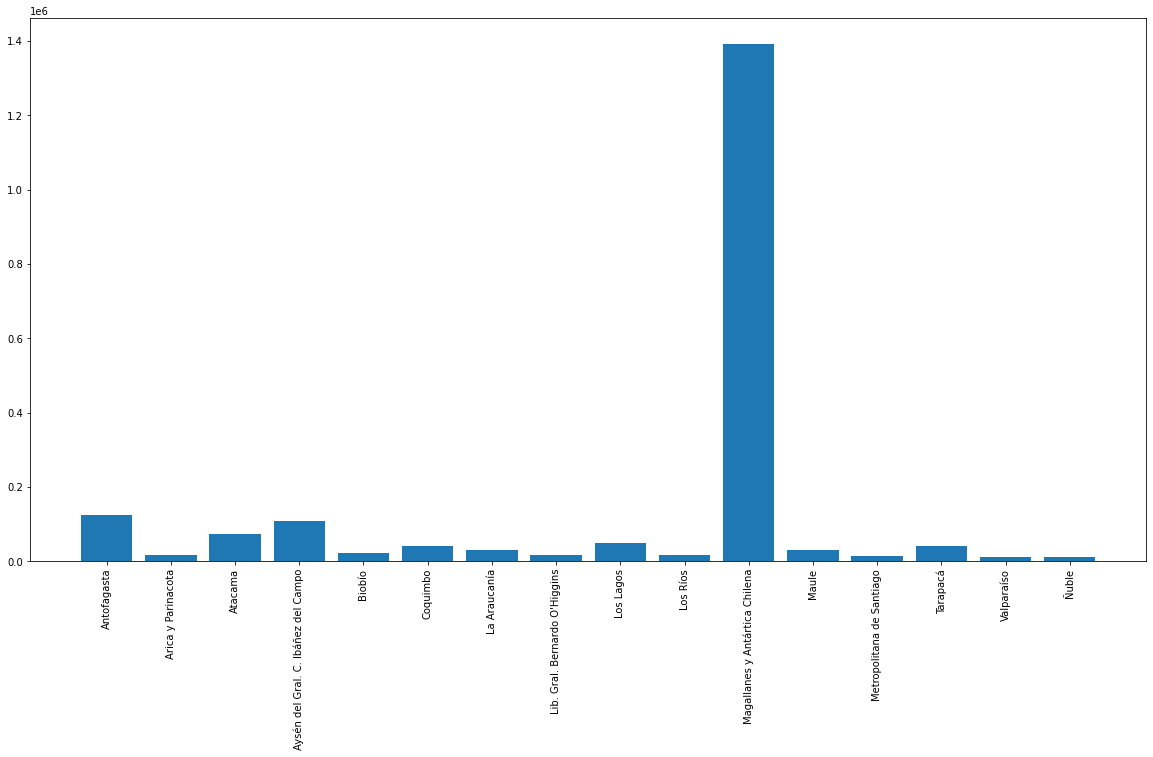

In [62]:
import matplotlib.pyplot as plt

# Ajustamos el tamaño del gráfico
plt.rcParams['figure.figsize'] = [20, 10]

pop_by_comune = com_frame['pobl'].groupby(com_frame['reg']).sum()
plt.bar(pop_by_comune.keys(), pop_by_comune)

# Ajustamos la rotación de los labels
plt.xticks(rotation=90)

plt

### Índices jerárquicos

Podemos instanciar objetos de la clase `DataFrame` en que los índices son jerárquicos. Veamos un ejemplo (vamos a necesitar importar `numpy`).

In [63]:
import numpy as np

data_multindex = pd.DataFrame(np.arange(12).reshape(4, 3), 
                    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                    columns=['c1', 'c2', 'c3']) 
# La función reshape en este 
# caso distribuye los doce elementos 
# en una tabla de 4 filas y tres columnas

data_multindex

c1  c2  c3
a 1   0   1   2
  2   3   4   5
b 1   6   7   8
  2   9  10  11

In [64]:
data_multindex.iloc[0] # Esto nos arroja la primera fila.

c1    0
c2    1
c3    2
Name: (a, 1), dtype: int64

Si queremos localizar por índice, usamos la función `loc`:

In [65]:
data_multindex.loc['a']

,c1,c2,c3
1,0,1,2
2,3,4,5


In [66]:
data_multindex.loc['a'].loc[2] # La función loc accede según el label del índice, no la posición

c1    3
c2    4
c3    5
Name: 2, dtype: int64

### Joins

Podemos hacer _joins_ sobre los Data Frames. Partamos con un ejemplo sencillo de dos objetos de tipo `DataFrame` que comparten el nombre de un atributo en el que se desea hacer _join_:

In [79]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

In [80]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [81]:
df2

,key,data2
0,a,8
1,b,9
2,d,10
3,a,11


In [82]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,9
1,b,1,9
2,b,6,9
3,a,2,8
4,a,2,11
5,a,4,8
6,a,4,11
7,a,5,8
8,a,5,11


In [72]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


En la operación anterior, omitimos indicar explícitamente el atributo sobre el que estamos haciendo join. Para indicarlo hacemos lo siguiente:

In [83]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,9
1,b,1,9
2,b,6,9
3,a,2,8
4,a,2,11
5,a,4,8
6,a,4,11
7,a,5,8
8,a,5,11


En el caso de que los atributos se llamen de distinta forma:

In [84]:
df1 = pd.DataFrame({'key1': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key2': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2, left_on='key1', right_on='key2')

,key1,data1,key2,data2
0,b,0,b,9
1,b,1,b,9
2,b,6,b,9
3,a,2,a,8
4,a,2,a,11
5,a,4,a,8
6,a,4,a,11
7,a,5,a,8
8,a,5,a,11


En el caso de necesitar un _Outer Join_ (esto es, seguir incluyendo valores que no hacen _match_ con alguna fila en la otra tabla), podemos indicarlo con el argumento `how`. Puede ser `'left'`, `'right'` o `'outer'`. Veamos un ejemplo de _Left Outer Join_:

In [86]:
df1

,key1,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [85]:
df1 = pd.DataFrame({'key1': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key2': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2, left_on='key1', right_on='key2', how='left')

,key1,data1,key2,data2
0,b,0,b,9.0
1,b,1,b,9.0
2,a,2,a,8.0
3,a,2,a,11.0
4,c,3,NaN,NaN
5,a,4,a,8.0
6,a,4,a,11.0
7,a,5,a,8.0
8,a,5,a,11.0
9,b,6,b,9.0


En el caso de querer un _join_ por más de un argumento, puedo indicar una lista de atributos. También puedes renombrar atributos en el caso de que su nombre sea igual en ambos Data Frame y no quieras generar conflictos. Esto lo puedes hacer mediante el argumento `suffixes`. Para ver más puedes consultar la documentación.

Lo último que veremos es cómo hacer un _join_ utilizando una de los índices.

In [88]:
df1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                    'value': np.arange(6)})
df2 = pd.DataFrame({'dvalue': [10, 20]}, index=['a', 'b'])

In [89]:
df1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [90]:
df2

,dvalue
a,10
b,20


In [92]:
pd.merge(df1, df2, left_on='key', right_index=True)

,key,value,dvalue
0,a,0,10
2,a,2,10
3,a,3,10
1,b,1,20
4,b,4,20


También puedes utilizar `merge` con índices jerárquicos. Puedes buscar más información en la documentación de `pandas`.